<a href="https://colab.research.google.com/github/SunnyDahitJ/Computer_Vision/blob/main/cv_practical_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

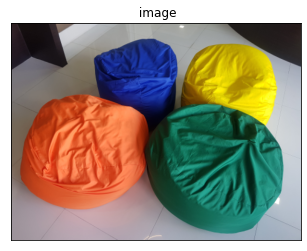

In [6]:
# nemo1 = cv.imread('/content/drive/MyDrive/Computer_vision/Input images/nemo.jpg')
nemo1 = cv.imread('/content/drive/MyDrive/Computer_vision/Input images/bags.png')

nemo = cv.cvtColor(nemo1, cv.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.title(" image"), plt.xticks([]), plt.yticks([])
plt.show()




In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

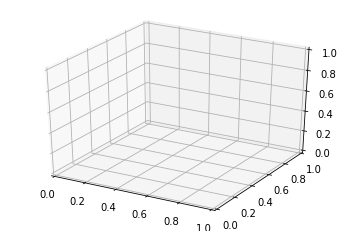

In [8]:
r, g, b = cv.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

In [9]:
pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

In [10]:
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [11]:
hsv_nemo = cv.cvtColor(nemo, cv.COLOR_RGB2HSV)



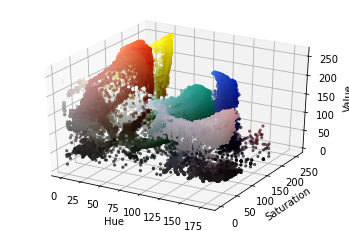

In [12]:
h, s, v = cv.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [13]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

In [14]:
from matplotlib.colors import hsv_to_rgb


In [15]:
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

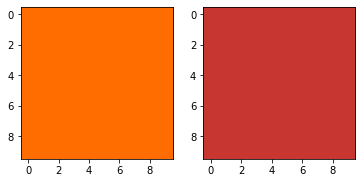

In [16]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [17]:
mask = cv.inRange(hsv_nemo, light_orange, dark_orange)


In [18]:
result = cv.bitwise_and(nemo, nemo, mask=mask)


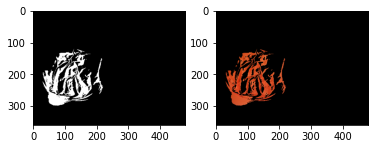

In [19]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()  

In [20]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

In [21]:
lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

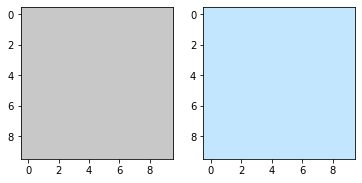

In [22]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

In [23]:
mask_white = cv.inRange(hsv_nemo, light_white, dark_white)
result_white = cv.bitwise_and(nemo, nemo, mask=mask_white)

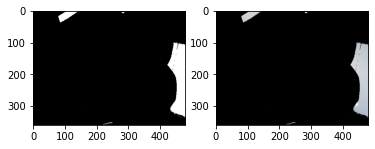

In [24]:
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

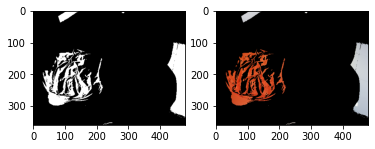

In [25]:
final_mask = mask + mask_white

final_result = cv.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()